# Assessment Review

The topics covered will be:

1. Normal Distributions
2. Statistical Tests
3. Bayesian Statistics
4. Linear Regression

In [1]:
from src.call import call_on_students

## Part 1: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 1: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [2]:
call_on_students(1)

## MY ANSWER WAS WRONG - DON'T TAKE SQUARE ROOT

In [55]:
# Code here - my solution
import numpy as np

z_eight = (8-6)/np.sqrt(2)
z_eight

1.414213562373095

In [56]:
# Kevin's Solution

mu = 6
std = 2

z_eight = (8-mu)/std
z_eight

1.0

### Task 2: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [4]:
# call_on_students(1)

## MY ANSWER

In [57]:
# Code here
import scipy.stats as stats

over_eight = stats.norm.sf(z_eight)

over_eight

0.15865525393145707

In [58]:
# Student's/true answer
# import scipy.stats as st
# over_eight = st.norm.sf(z_eight)


(4.53757712628571, 5.46242287371429)

### Task 3: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [6]:
# call_on_students(1)

## MY ANSWER - I did it the hard way - use stats.t.interval()

In [11]:
# Code here
n = 7
X_0 = 5
std = .5
Mu = 6
Sigma = 2 


In [64]:
# TOTALLY INCORRECT
t_score = (X_0-Mu)/(std/np.sqrt(n-1))

student_top = X_0 + (1 - (t_score * (std/np.sqrt(n))))

student_bottom = X_0 - (1 - (t_score * (std/np.sqrt(n))))

print(student_bottom, student_top)

3.0741799002274486 6.925820099772551


In [65]:
# Student's/true answer
# import scipy.stats as st
# over_eight = st.norm.sf(z_eight)

n = 7
mu = 6
x_bar = 5
sigma = .5
alpha = .95

stats.t.interval(alpha=alpha, df=n-1, loc=x_bar, scale=sigma/np.sqrt(n))

(4.53757712628571, 5.46242287371429)

### Task 4: Interpret the 95% Confidence Interval that you derived in the above question

In [ ]:
# call_on_students(1)

Interpret: 

- The confidence interval shows that 95% of the nights the student will sleep between (4.53757712628571, 5.46242287371429) hours


## Part 2: Hypothesis Testing

Let's make some hypotheses about cars!

### Task 5: Set Up

In [ ]:
# call_on_students(1)

In [14]:
# Imports - need pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv('./data/auto-mpg.csv')

In [16]:
# Check the head of our data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [17]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [18]:
# Describe the data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


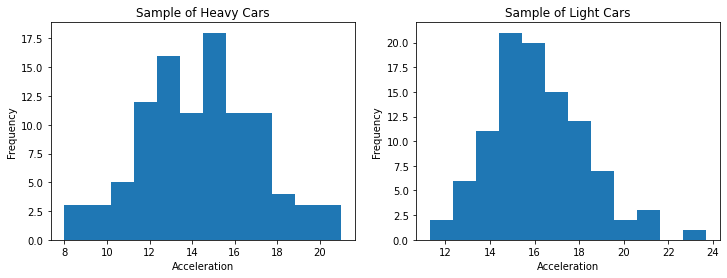

In [19]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate faster than heavy cars.

### Task 6: Set up the null and alternative hypotheses for this test

In [ ]:
# call_on_students(1)

**Null hypothesis:**

- light cars accelerate at the same rate or slower than heavy cars


**Alternative hypothesis:**

- light cars accelerate faster than heavy cars


### Task 7: Describe your Type 1 and Type 2 errors in this context

In [ ]:
# call_on_students(1)

**Type I Error:**

- we say the light cars accelerate faster when they actually dont


**Type II Error:**

- we say the p value isn't small enough to reject the null that heavy/fast cars have same accel, or light cars accel slower



### Task 8: The Hypothesis Test!

### 8a: Describe the type of test:

In [ ]:
# call_on_students(1)

Description:

- two sample t test


### 8b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [ ]:
# call_on_students(1)

In [21]:
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

In [25]:
print(heavy_cars['acceleration'].mean())
print(light_cars['acceleration'].mean())

14.350999999999999
16.104


In [23]:
heavy_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 239 to 0
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           100 non-null    float64
 1   cylinders     100 non-null    int64  
 2   displacement  100 non-null    float64
 3   horsepower    100 non-null    int64  
 4   weight        100 non-null    int64  
 5   acceleration  100 non-null    float64
 6   model year    100 non-null    int64  
 7   origin        100 non-null    int64  
 8   car name      100 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 7.8+ KB


## Make sure to divide the t_test p value by 2 - ttest_ind is only a two tailed test by default, so it doubles the P value

In [24]:
# Code here
from scipy import stats

t_test = stats.ttest_ind(heavy_cars['acceleration'], light_cars['acceleration'], equal_var=True)

t_test

Ttest_indResult(statistic=-5.00874014469676, pvalue=1.2096440668168987e-06)

### 8c: Analyze your results: can you reject the null hypothesis?

In [ ]:
# call_on_students(1)

Can you reject the null hypothesis?

- yes - with a p value of 1.2096440668168987e-06 - the p value is far below the .05 threshold. Given the mean values above fdor acceleration (light cars have a higher acceleration rate) we know the light cars DO accelerate faster with statistical significance


## Part 3: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

### Task 9: Calculate the probability

In [ ]:
# call_on_students(1)

In [26]:
pa = .6
pb_g_a = .75

pb = (pa*pb_g_a) + ((1-pa)*.05)

pb

0.47

In [27]:
answer = (pb_g_a*pa) / pb

In [28]:
answer

0.9574468085106382

**1. Which probability are we trying to find?**

   - what is the conditional probability that this individual is a Democrat given they voted no? or P(A|B)
   
    
**2. Based on that, what other pieces do we need?**

   - P(B)
    
    
**3. Result?**

   - 0.9574468085106382%
    

## Part 4: Simple Linear Regression

**BACK TO CARS**

### The Prompt:

> Car manufacturers have asked us to predict how many miles per gallon a car can run based on the other variables we have in the data we're given. 

Sounds like a regression problem! But first let's further explore the data.

### Task 10: Explore the Data Visually

In [29]:
import seaborn as sns

In [ ]:
# call_on_students(1)

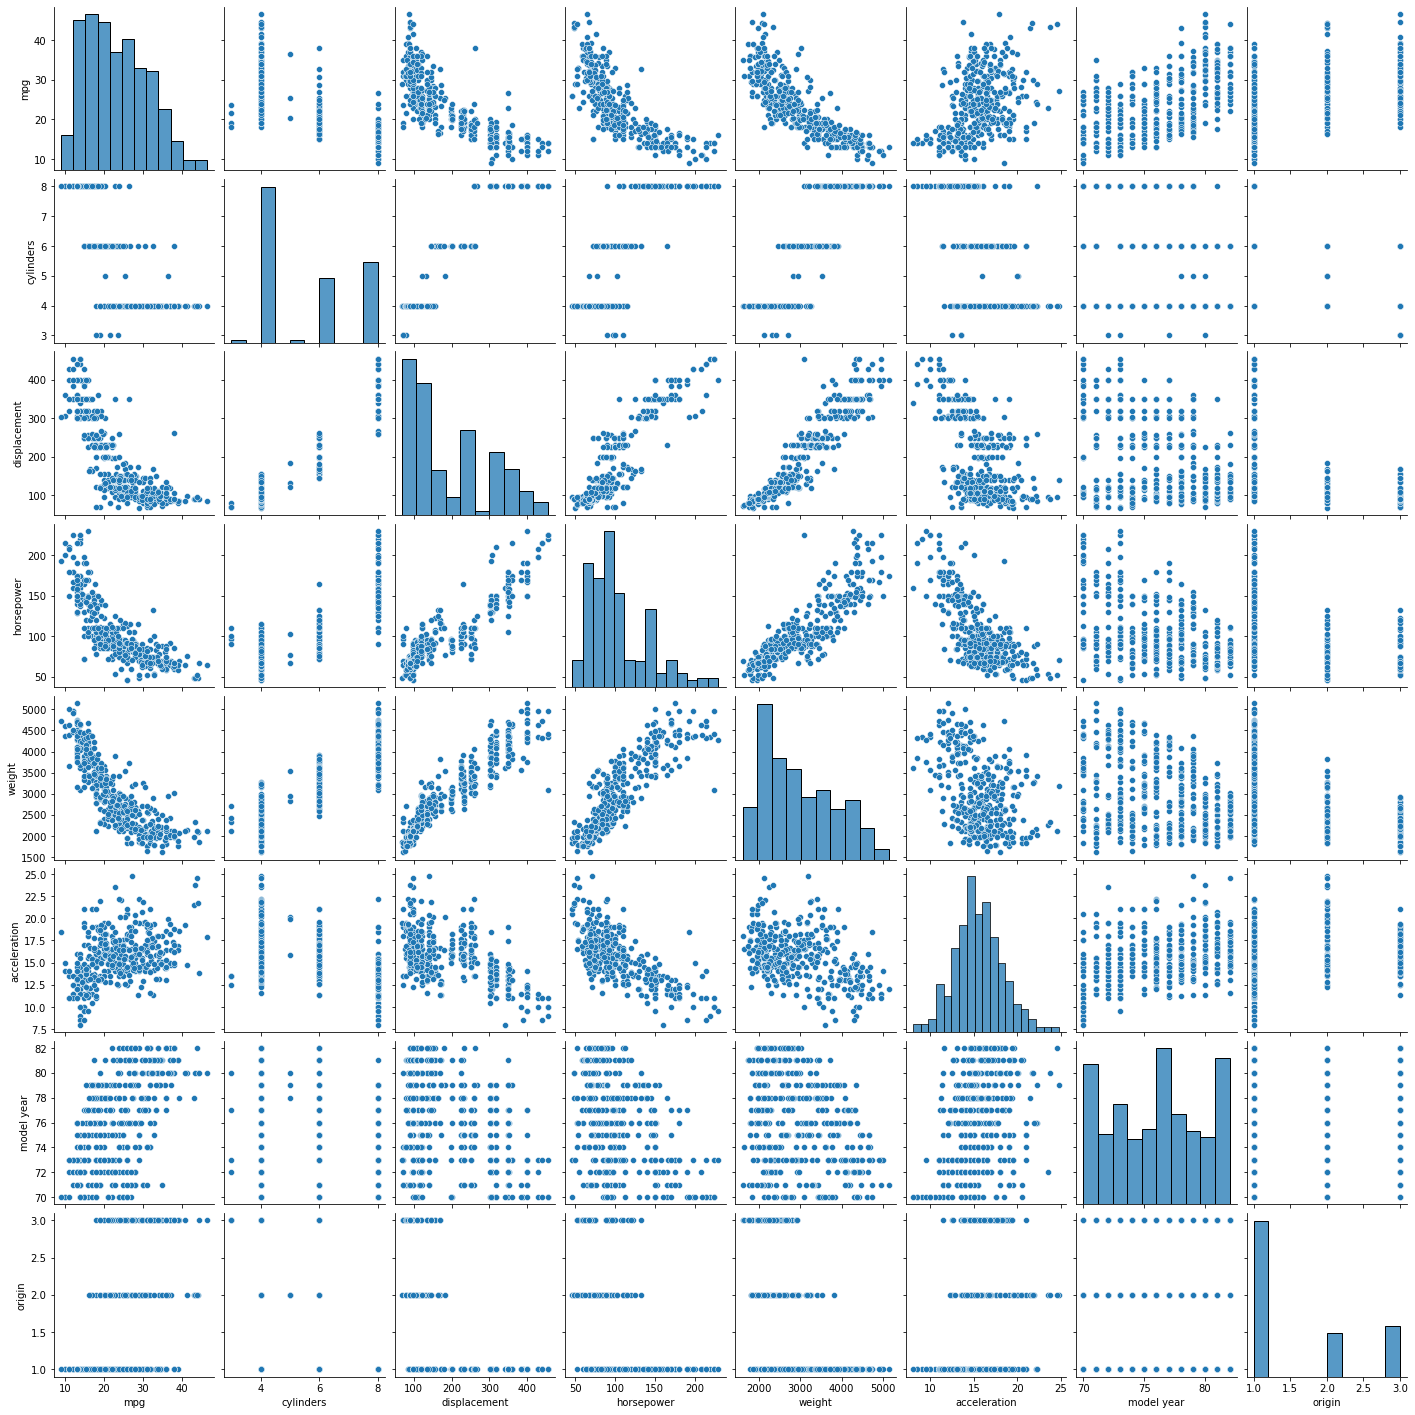

In [30]:
# Make a pairplot using seaborn to examine the relationships between variables
# Note - do this on the whole dataframe, not just independent variables
sns.pairplot(df)

<AxesSubplot:>

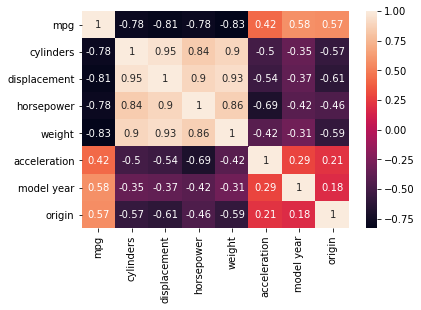

In [33]:
# Create a correlation heatmap as well, with seaborn plus the 'corr' function
sns.heatmap(df.corr(), annot=True)

### Task 11: Explore your variables

Look at both at the pairplot and the correlation heatmap - what are some trends you see? Any potential problems?

Here, we expect you to look at what kinds of data you have. You may also want to discuss how the data is distributed. Analyze both the relationships between independent variables and the relationships between independent variables and your target/dependent variable (miles per gallon).

In [ ]:
# call_on_students(1)

**Observations:**

- cylinders, displacement, horespower, and weight are all highly correlated

- This makes sense, as larger engines would need more cylinders to perform adequately, and the weight would increase as the engine increases in size

- For a sinlge linear regression, looking at weight may be wthe best variable to use as the independent, since it has the strongest correlation to mpg, even though it's a negative relationship


### Task 12: Pick one X variable and model

Pick the variable you think would be best to use to predict MPG, and create, fit and summarize the output of a statsmodels OLS model!

Set the summary output equal to `simple_model_summary`

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# call_on_students(1)

In [35]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X!
X = df[['weight']]

y = df['mpg']

simple_model = sm.OLS(y, sm.add_constant(X)).fit()


In [37]:
simple_model_summary = simple_model.summary()

simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          6.02e-102
Time:                        13:31:01   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 13: Interpret!

In [ ]:
# call_on_students(1)

There are many things you could observe from this output, but I want especially for you to make an inference about the relationship between the X variable and MPG.

- If a car weighed 0 pound(kg, etc), it could have an mpg of 46.215

- For every additional increment in weight, the mpg decreases by 0.0076 miles per gallon


### Task 14: Model with all numeric X variables

Create, fit and summarize the output of a statsmodels OLS model that has all of the possible X variables in our dataset!

Set the summary output equal to `model_summary`

In [38]:
# Want to use 'cylinders', 'displacement', 'horsepower', 'weight' and 'acceleration'
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# call_on_students(1)

In [39]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X! 
X_all = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]

y = df['mpg']

simple_model = sm.OLS(y, sm.add_constant(X_all)).fit()

In [40]:
model_summary = simple_model.summary()

In [41]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          9.82e-101
Time:                        13:35:31   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.2643      2.669     17.331      0.000      41.016      51.513
cylinders       -0.3979      0.411     -0.969      0.333      -1.205       0.409
displacement -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
horsepower      -0.0453      0.017     -2.716      0.007      -0.078      -0.012
weight          -0.0052      0.001     -6.351      0.000      -0.007      -0.004
acceleration    -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 15: Interpret!


In [ ]:
# call_on_students(1)

Specifically, compare this model summary to your simple model's summary.

- This model is statistically significant, and the R2 increased by .074
Original R2:.693 
Multilinear Adj R2: .704

- displacement and cylinders were not statistically significant coefficients

In [45]:
weights = simple_model.params

weights

const           46.264308
cylinders       -0.397928
displacement    -0.000083
horsepower      -0.045257
weight          -0.005187
acceleration    -0.029105
dtype: float64

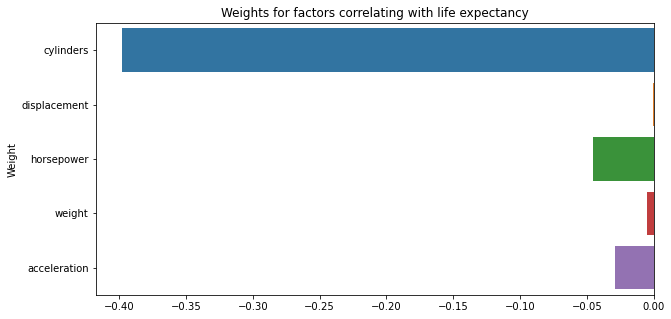

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with MPG")
plt.ylabel('Weight of the ind variables')
plt.show()

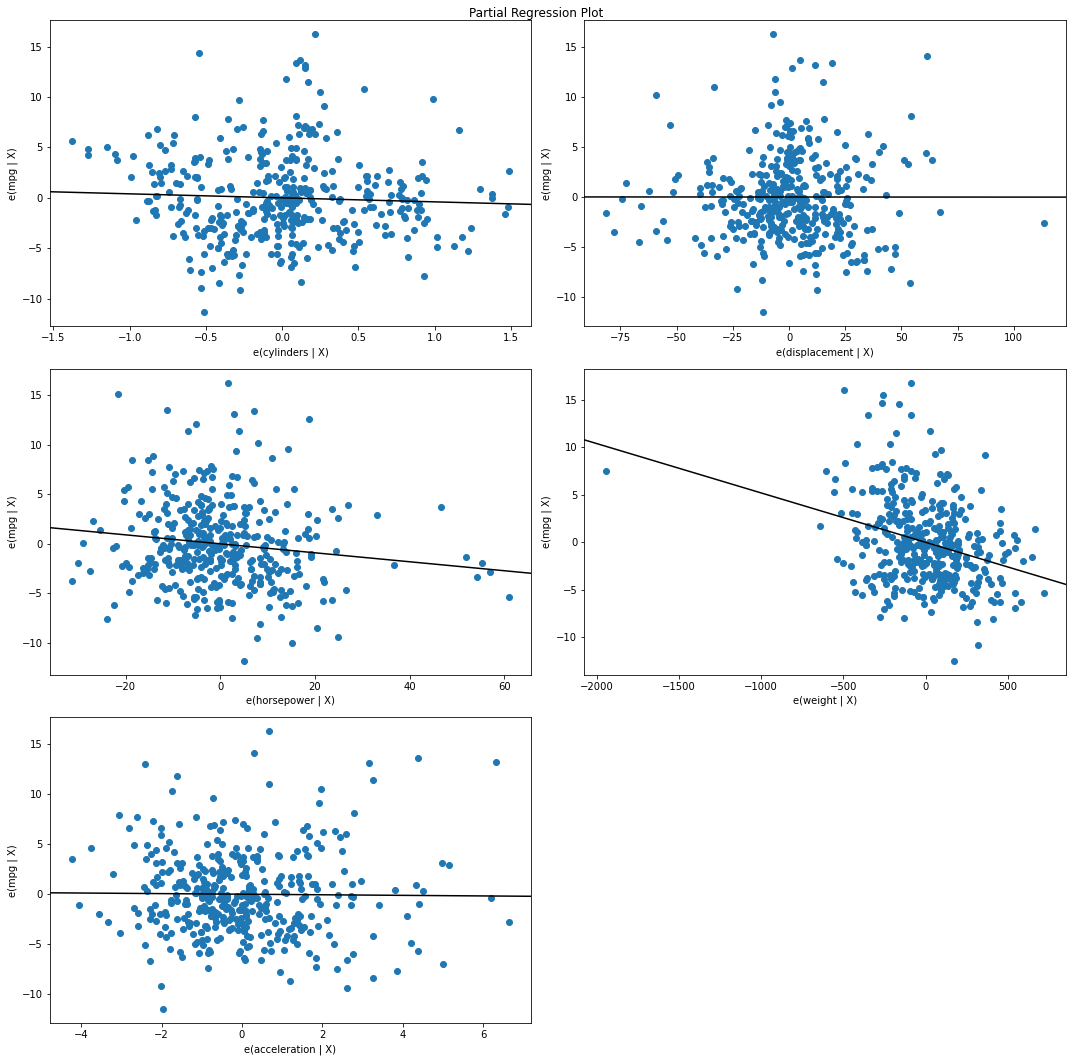

In [44]:
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(simple_model, exog_idx=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], fig=fig)
plt.tight_layout()
plt.show()

In [46]:
X_standard = X_all.apply(lambda x: (x-x.mean())/ x.std())

In [47]:
standardized_model = sm.OLS(y, sm.add_constant(X_standard)).fit()

In [48]:
s_model_summary = simple_model.summary()

s_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          9.82e-101
Time:                        13:44:33   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.2643      2.669     17.331      0.000      41.016      51.513
cylinders       -0.3979      0.411     -0.969      0.333      -1.205       0.409
displacement -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
horsepower      -0.0453      0.017     -2.716      0.007      -0.078      -0.012
weight          -0.0052      0.001     -6.351      0.000      -0.007      -0.004
acceleration    -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
weights = standardized_model.params

weights

const           23.445918
cylinders       -0.678780
displacement    -0.008699
horsepower      -1.741998
weight          -4.405781
acceleration    -0.080296
dtype: float64

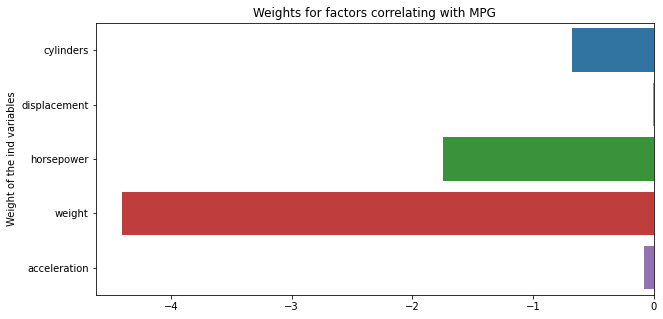

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with MPG")
plt.ylabel('Weight of the ind variables')
plt.show()

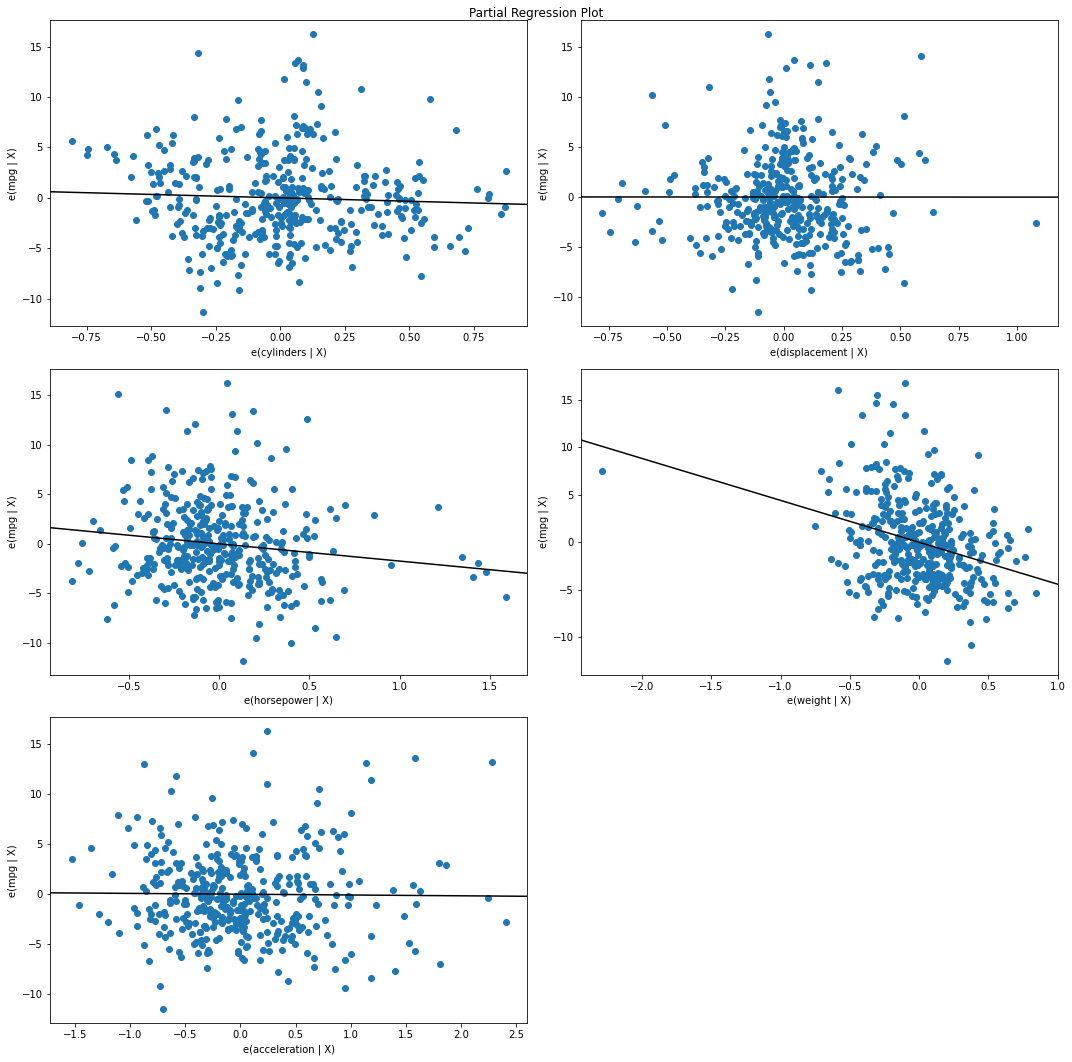

In [51]:
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(standardized_model, exog_idx=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], fig=fig)
plt.tight_layout()
plt.show()